In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.covariance
import sklearn.mixture
import pandas as pd


In [2]:
t = np.array([5,10,15,20,25,30])
h = np.array([722, 1073, 1178,1177,781,102])

X = np.c_[np.ones(6), t]

Xt = np.transpose(X)

inv = np.linalg.inv(np.dot(Xt, X))
tr = np.dot(inv, Xt)
coefs = np.dot(tr, h)

In [3]:
from sklearn.linear_model import LinearRegression as reg

res = reg().fit(X, h)

In [4]:
def RegressionWithCosts(s, y, costs=None):
    X = np.c_[np.ones(s.shape[0]), s]
    Xt = np.transpose(X)
    if costs is None:
        W = np.eye(s.shape[0])
    else:
        W = np.diag(costs)

    inv = np.linalg.inv(np.dot(np.dot(Xt, W), X))
    coefs = np.dot(np.dot(np.dot(inv, Xt), W), y)
    return coefs


In [5]:
RegressionWithCosts(t, h)

array([1236.53333333,  -22.72571429])

In [6]:
x1 = np.array([0,1,1.9,2])
y1 = np.array([0.1,1.9,4.1,5])
c1 = RegressionWithCosts(x1, y1)
res1 = reg().fit(x1.reshape(-1,1), y1)
x2 = np.array([2,3.1,4,5])
y2 = np.array([5,5.9,7,8.5])
res2 = reg().fit(x2.reshape(-1,1), y2)
res1.predict(np.array([2]).reshape(-1,1))
res2.predict(np.array([2]).reshape(-1,1))
# RegressionWithCosts(x2, y2)

array([4.81940907])

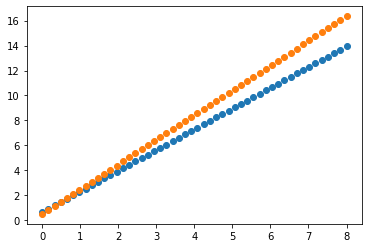

In [7]:
x = [0,1,1.9,2,3.1,4,5]
y = [0.1,1.9,4.1,5,5.9,7,8.5]

x01 = [0,1,1.9,2,0,0  ,0,0]
x02 = [0,0,0,  0,2,3.1,4,5]
y00 = [0.1,1.9,4.1,5,5,5.9,7,8.5]

x00 = np.c_[x01, x02]
res = reg().fit(x00, y00)

f = np.linspace(0,8,100)
v = np.linspace(0,8,100)
x = np.linspace(0,8,50)
f[::2]=0
v[1::2]=0
dd1=res.predict(f.reshape((-1,2)))
dd2=res.predict(v.reshape((-1,2)))
plt.scatter(x, dd1)
plt.scatter(x, dd2)
plt.show()

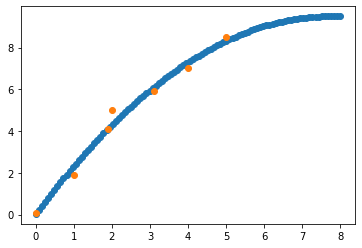

In [8]:
x = np.array([0,1,1.9,2,3.1,4,5])
y = np.array([0.1,1.9,4.1,5,5.9,7,8.5])
x00 = np.c_[x, x**2]
res = reg().fit(x00, y)
vl = np.linspace(0,8,100)
vf = vl ** 2
v = np.c_[vl, vf]
dd = res.predict(v)
plt.scatter(vl, dd)
plt.scatter(x, y)
plt.show()

In [9]:
x3 = np.array([5,10,15,20,25, 30])
y3 = [732, 1083, 1188, 1187, 791, 112]
costs3 = [1,1,1,2,1.5,0.5]
x_o = np.c_[x3, x3**2]

RegressionWithCosts(x_o, y3, costs3)

array([ 41.645682  , 158.09096045,  -5.13819209])